### Linear Regression

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
reg = LinearRegression()

In [15]:
X = [[1],[2],[3],[4],[5],[6]]
y = [2, 2.5, 4.5, 3, 5, 4.7]

In [16]:
reg.fit(X,y)

LinearRegression()

In [17]:
predicted_value = reg.predict([[5.5]])[0]
predicted_value

4.730952380952381

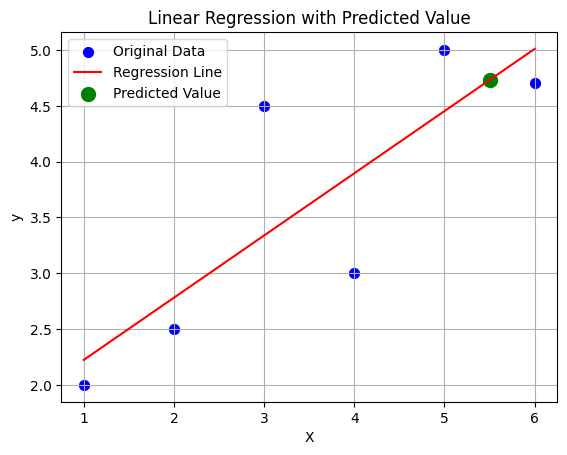

In [18]:
plt.scatter(X, y, color='blue', label='Original Data', s=50)

x_range = [[i] for i in range(1, len(X)+1)]  
y_range = reg.predict(x_range)  
plt.plot([i[0] for i in x_range], y_range, color='red', label='Regression Line')

plt.scatter([5.5], [predicted_value], color='green', label='Predicted Value', s=100)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

#### Boston Housing Price Dataset

In [18]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [19]:
df['CHAS'] = df['CHAS'].cat.codes
df['RAD'] = df['RAD'].cat.codes

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,1,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,1,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,2,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,2,222.0,18.7,396.90,5.33,36.2


In [21]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int8   
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int8   
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int8(2)
memory usage: 48.6 KB
None


In [22]:
X = df.drop(columns=['MEDV'])  # MEDV is the target column (price)
y = df['MEDV']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 22.18
R-squared: 0.70


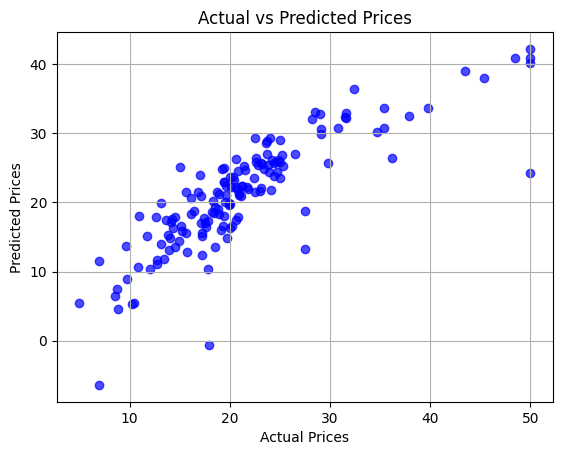

In [27]:
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid()
plt.show()

In [28]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance (Coefficients):")
print(coefficients)


Feature Importance (Coefficients):
    Feature  Coefficient
0      CRIM    -0.110671
1        ZN     0.038360
2     INDUS     0.034072
3      CHAS     3.253355
4       NOX   -14.495791
5        RM     4.152987
6       AGE    -0.013575
7       DIS    -1.400937
8       RAD     0.430811
9       TAX    -0.003275
10  PTRATIO    -0.820525
11        B     0.011307
12    LSTAT    -0.541672


In [29]:
min_price = df['MEDV'].min()
max_price = df['MEDV'].max()

print(f"Minimum house price: ${min_price * 1000:.2f}")
print(f"Maximum house price: ${max_price * 1000:.2f}")

Minimum house price: $5000.00
Maximum house price: $50000.00


### Kaggale Store Sales Prediction